In [7]:
import pandas as pd
from matplotlib import pyplot as plt

data1 = pd.read_csv(r"D:\Desktop\MCM\2025_MCM_C\别人呢的\MCM2025_C_Cleaned_Data-main\summerOly_medal_counts.csv")
data1['NOC'] = data1['NOC'].replace({'Soviet Union': 'Russia'})

In [8]:
#检测数据 
print(data1.info())
print(data1.isna().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    1435 non-null   int64 
 1   NOC     1435 non-null   object
 2   Gold    1435 non-null   int64 
 3   Silver  1435 non-null   int64 
 4   Bronze  1435 non-null   int64 
 5   Total   1435 non-null   int64 
 6   Year    1435 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 78.6+ KB
None
Rank      False
NOC       False
Gold      False
Silver    False
Bronze    False
Total     False
Year      False
dtype: bool


In [9]:
averages = data1.groupby('NOC')[['Gold', 'Silver', 'Bronze', 'Total']].mean().round(0).astype(int).reset_index()
averages


,NOC,Gold,Silver,Bronze,Total
0,Afghanistan,0,0,1,1
1,Albania,0,0,2,2
2,Algeria,1,0,1,2
3,Argentina,1,1,2,4
4,Argentina,3,1,0,4
...,...,...,...,...,...
186,Virgin Islands,0,1,0,1
187,West Germany,11,13,16,41
188,Yugoslavia,2,2,2,6
189,Zambia,0,0,1,1


In [10]:
"""import pycountry
df_averages = averages
def noc_to_country_name(noc_code):
    try:
        # 使用 pycountry 查询国家名称
        country = pycountry.countries.get(alpha_3=noc_code)
        return country.name
    except AttributeError:
        # 处理特殊映射（例如某些奥委会代码与标准 ISO 代码不一致）
        special_cases = {
            "USA": "United States",
            "CHN": "China",
            "JPN": "Japan",
            "GBR": "United Kingdom",
            "RUS": "Russia",
            "GER": "Germany",
            "KOR": "South Korea",
            # 添加其他需要的映射...
        }
        return special_cases.get(noc_code, noc_code)  # 如果未找到，返回原代码
"""
# 应用映射到 DataFrame
averages["Country"] = averages["NOC"]

In [11]:
averages

,NOC,Gold,Silver,Bronze,Total,Country
0,Afghanistan,0,0,1,1,Afghanistan
1,Albania,0,0,2,2,Albania
2,Algeria,1,0,1,2,Algeria
3,Argentina,1,1,2,4,Argentina
4,Argentina,3,1,0,4,Argentina
...,...,...,...,...,...,...
186,Virgin Islands,0,1,0,1,Virgin Islands
187,West Germany,11,13,16,41,West Germany
188,Yugoslavia,2,2,2,6,Yugoslavia
189,Zambia,0,0,1,1,Zambia


In [32]:
import plotly.express as px
import country_converter as coco

# 标准化国家名称（处理简称/别称）
# 标准化国家名称（确保与地图数据库匹配）
# 选择以下任一颜色主题
color_scale = "Tealrose"     # 蓝绿色渐变（推荐）
# color_scale = "Mint"       # 薄荷绿
# color_scale = "Peach"      # 淡橙粉
# color_scale = "Pastel"     # 通用淡彩色
# color_scale = "Ice"        # 冰蓝色系

# 或自定义淡雅渐变色（HSL格式控制饱和度/亮度）
custom_colors = [
    [0.0, "hsl(180, 20%, 95%)"],   # 极淡蓝
    [0.2, "hsl(200, 30%, 85%)"],  
    [0.4, "hsl(220, 40%, 75%)"],
    [0.6, "hsl(240, 50%, 65%)"],
    [1.0, "hsl(260, 60%, 55%)"]
]
# 步骤2: 绘制地图（使用淡雅配色）
fig = px.choropleth(
    averages,
    locations="Country",
    locationmode="country names",
    color="Total",
    hover_name="Country",
    hover_data=["Gold", "Silver", "Bronze"],
    color_continuous_scale="Tealrose",  # 改用淡雅配色
    #title="Average Total Medals by Country (2000-2020)",
    labels={"Total": "Average Medals"},
    #range_color=[0, averages["Total"].quantile(0.9)],  # 聚焦非极端值范围
)

"""fig.add_trace(
    px.scatter_geo(
        top5,
        locations="Country",
        locationmode="country names",
        text="Label",
        size=[10]*5  # 控制文本背景点的大小（隐藏用）
    ).update_traces(
        textposition="middle center",
        textfont=dict(color="black", size=12, family="Arial Bold"),
        marker=dict(color="rgba(255,255,255,0)", size=0),  # 隐藏散点
        hoverinfo="skip"
    ).data[0]
)
"""


# 步骤3: 高级美学调整
fig.update_layout(
    # 颜色条样式
    coloraxis_colorbar=dict(
        title="Average Medals",
        thickness=15,
        len=0.6,
        yanchor="middle",
        y=0.5,
        x=0.9,
        tickfont=dict(color="#666666"),  # 灰色刻度文字
        titlefont=dict(color="#444444")  # 灰色标题
    ),
    
    # 全局布局
    margin={"r":0, "t":60, "l":0, "b":0},
    paper_bgcolor="rgba(0,0,0,0)",       # 透明背景
    plot_bgcolor="rgba(0,0,0,0)",
    font=dict(family="Time", size=16, color="#555555"),  # 统一字体颜色
    
    # 地图投影
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type="natural earth",
        #landcolor="rgba(240,240,240,0.8)",  # 陆地淡灰色
        bgcolor="rgba(255,255,255,0.5)"     # 背景微透明
    )
)

# 国家边框美化
fig.update_geos(
    showcountries=True,
    #countrycolor="rgba(200,200,200,0.5)",  # 半透明浅灰色边框
    countrywidth=2,
    projection_rotation=dict(lon=40),
    landcolor="white",       # 陆地填充色设为白色
    bgcolor="rgba(255,255,255,0)"  # 背景透明
)

# 保存为透明背景的PNG（适合嵌入PPT/海报）
fig.write_image("soft_medal_map.pdf", engine="orca", width=1400, height=800, scale=5)

# 显示图表
fig.show()

## **2024年的地图**

In [19]:
data_2024 = data1[data1["Year"]==2024]
data_2024_average = data_2024.groupby('NOC')[['Gold', 'Silver', 'Bronze', 'Total']].mean().round(0).astype(int).reset_index()

data_2024_average["Country"] = data_2024_average["NOC"]
print(data_2024_average.head())

         NOC  Gold  Silver  Bronze  Total    Country
0    Albania     0       0       2      2    Albania
1    Algeria     2       0       1      3    Algeria
2  Argentina     1       1       1      3  Argentina
3    Armenia     0       3       1      4    Armenia
4  Australia    18      19      16     53  Australia


In [40]:
import country_converter as coco
import plotly.express as px



# 标准化国家名称（确保与地图数据库匹配）
# 选择以下任一颜色主题
color_scale = "Tealrose"     # 蓝绿色渐变（推荐）
# color_scale = "Mint"       # 薄荷绿
# color_scale = "Peach"      # 淡橙粉
# color_scale = "Pastel"     # 通用淡彩色
# color_scale = "Ice"        # 冰蓝色系

# 或自定义淡雅渐变色（HSL格式控制饱和度/亮度）
custom_colors = [
    [0.0, "hsl(180, 20%, 95%)"],   # 极淡蓝
    [0.2, "hsl(200, 30%, 85%)"],  
    [0.4, "hsl(220, 40%, 75%)"],
    [0.6, "hsl(240, 50%, 65%)"],
    [1.0, "hsl(260, 60%, 55%)"]
]

# 步骤2: 绘制地图（使用淡雅配色）
fig = px.choropleth(
    data_2024_average,
    locations="Country",
    locationmode="country names",
    color="Total",
    hover_name="Country",
    hover_data=["Gold", "Silver", "Bronze"],
    color_continuous_scale="Tealrose",  # 改用淡雅配色
    #title="Average Total Medals by Country (2000-2020)",
    labels={"Total": "Average Medals"},
    #range_color=[0, averages["Total"].quantile(0.9)],  # 聚焦非极端值范围
)

"""fig.add_trace(
    px.scatter_geo(
        top5,
        locations="Country",
        locationmode="country names",
        text="Label",
        size=[10]*5  # 控制文本背景点的大小（隐藏用）
    ).update_traces(
        textposition="middle center",
        textfont=dict(color="black", size=12, family="Arial Bold"),
        marker=dict(color="rgba(255,255,255,0)", size=0),  # 隐藏散点
        hoverinfo="skip"
    ).data[0]
)
"""
# 步骤3: 高级美学调整
fig.update_layout(
    # 颜色条样式
    coloraxis_colorbar=dict(
        title="Average Medals",
        thickness=15,
        len=0.6,
        yanchor="middle",
        y=0.5,
        x=0.9,
        tickfont=dict(color="#666666"),  # 灰色刻度文字
        titlefont=dict(color="#444444")  # 灰色标题
    ),
    
    # 全局布局
    margin={"r":0, "t":60, "l":0, "b":0},
    paper_bgcolor="rgba(0,0,0,0)",       # 透明背景
    plot_bgcolor="rgba(0,0,0,0)",
    font=dict(family="Time", size=16, color="#555555"),  # 统一字体颜色
    
    # 地图投影
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type="natural earth",
        #landcolor="rgba(240,240,240,0.8)",  # 陆地淡灰色
        bgcolor="rgba(255,255,255,0.5)"     # 背景微透明
    )
)

# 国家边框美化
fig.update_geos(
    showcountries=True,
    #countrycolor="rgba(200,200,200,0.5)",  # 半透明浅灰色边框
    countrywidth=2,
    projection_rotation=dict(lon=40),
    landcolor="hsl(180, 20%, 95%)",  # 陆地填充色
    oceancolor="white",              # 海洋颜色
    bgcolor="white",                 # 画布背景色
    showocean=True                   # 显示海洋
)

# 保存为透明背景的PNG（适合嵌入PPT/海报）
#fig.write_image("2024_soft_medal_map.pdf", engine="orca", width=1400, height=800, scale=5)

# 显示图表
fig.show()

In [21]:
# 转换数据为长格式
df_melted = data_2024_average.melt(
    id_vars='Country',
    value_vars=['Gold', 'Silver', 'Bronze'],
    var_name='MedalType',
    value_name='Count'
)
df_melted

,Country,MedalType,Count
0,Albania,Gold,0
1,Algeria,Gold,2
2,Argentina,Gold,1
3,Armenia,Gold,0
4,Australia,Gold,18
...,...,...,...
268,Uganda,Bronze,0
269,Ukraine,Bronze,4
270,United States,Bronze,42
271,Uzbekistan,Bronze,3


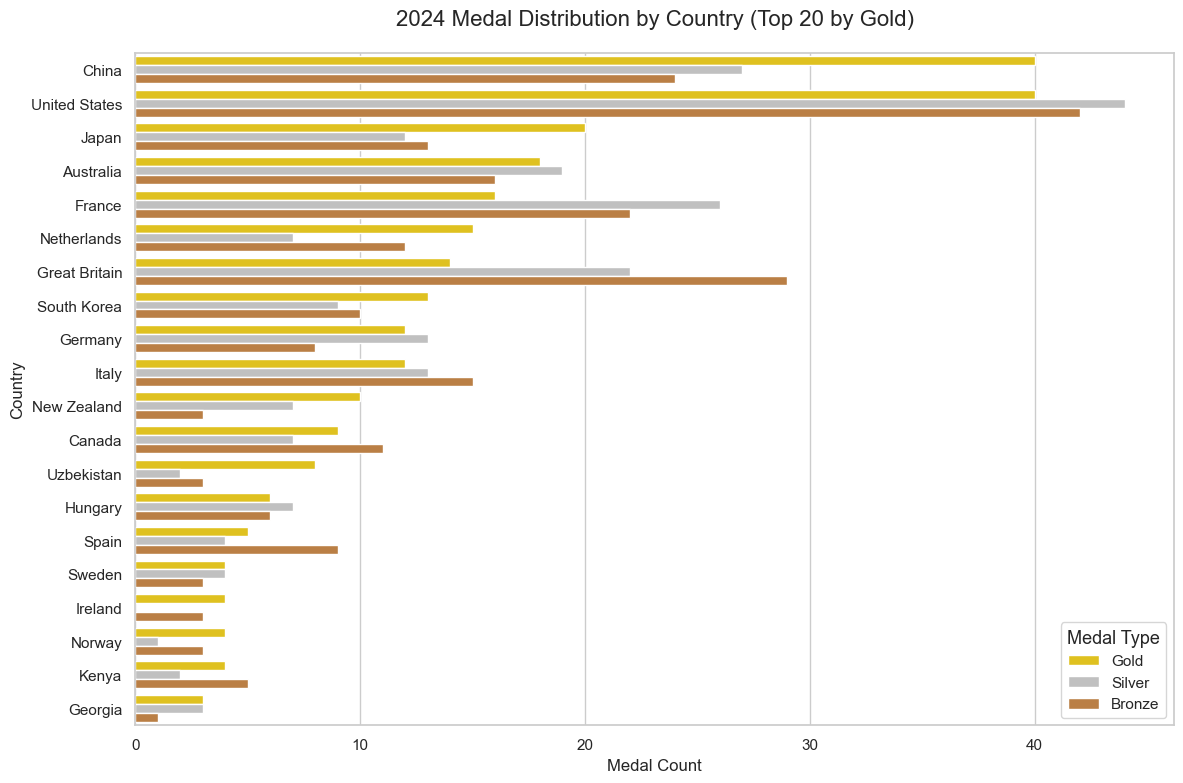

In [22]:
# 按金牌数排序并取前20个国家
import matplotlib.pyplot as plt
import seaborn as sns
top20_data = data_2024_average.sort_values('Gold', ascending=False).head(20)

# 转换数据为长格式 (只处理前20个国家)
df_melted = top20_data.melt(
    id_vars='Country',
    value_vars=['Gold', 'Silver', 'Bronze'],
    var_name='MedalType',
    value_name='Count'
)

# 创建排序索引 (基于原始排序结果)
sorted_countries = top20_data['Country']
df_melted['Country'] = pd.Categorical(
    df_melted['Country'], 
    categories=sorted_countries, 
    ordered=True
)
df_melted = df_melted.sort_values('Country')

# 可视化设置保持不变... (后续代码与原始相同)
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
palette = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': '#cd7f32'}

sns.barplot(
    data=df_melted,
    x='Count',
    y='Country',
    hue='MedalType',
    palette=palette,
    orient='h'
)

plt.xlabel('Medal Count', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('2024 Medal Distribution by Country (Top 20 by Gold)', fontsize=16, pad=20)  # 修改标题
plt.legend(title='Medal Type', title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.show()

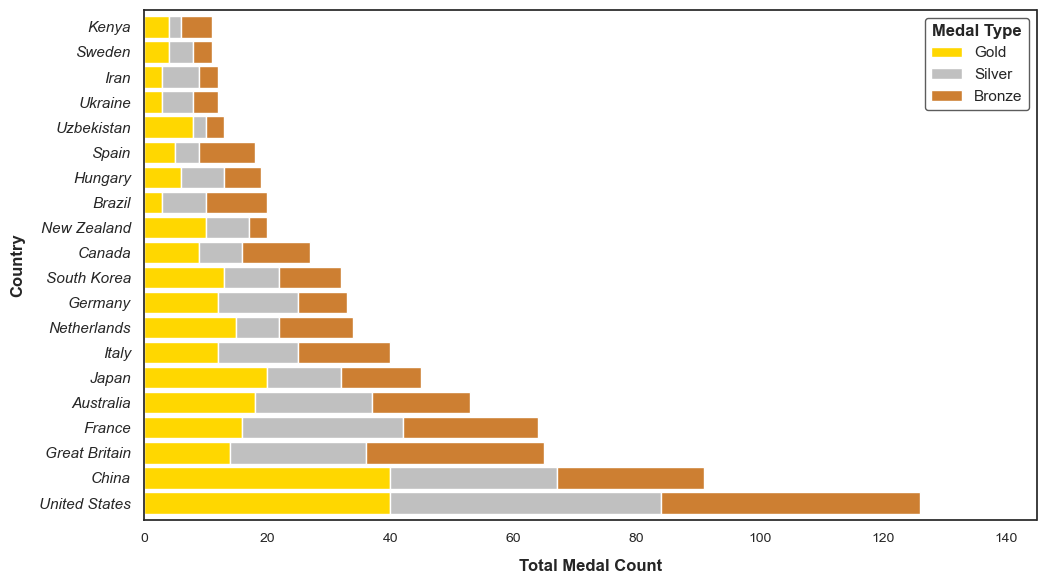

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 数据准备 ------------------------------------------------------------
top20_sorted = data_2024_average.sort_values('Total', ascending=True).tail(20)
top20_sorted = top20_sorted.sort_values('Total', ascending=False)  # 总奖牌最少在上

# 样式设置 ------------------------------------------------------------
plt.style.use('default')
sns.set_theme(style="white")
"""plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'axes.edgecolor': '#333333',  # 统一边框颜色
    'axes.linewidth': 1.2,        # 加粗边框
    'axes.labelcolor': '#333333',
    'text.color': '#333333'
})"""

# 创建图形 ------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12.5, 6), facecolor='white')  # 明确设置背景色
#fig.patch.set_linewidth(1.2)  # 图形外边框粗细
#fig.patch.set_edgecolor('#333333')  # 图形外边框颜色""

# 配置堆叠顺序和颜色 --------------------------------------------------
medal_cols = ['Gold', 'Silver', 'Bronze']
colors = ['#FFD700', '#C0C0C0', '#CD7F32']

# 绘制水平堆叠条形图 --------------------------------------------------
top20_sorted.set_index('Country')[medal_cols].plot(
    kind='barh',
    stacked=True,
    color=colors,
    ax=ax,
    width=0.85,
    edgecolor='white'
)

# 动态坐标范围调整 ----------------------------------------------------
max_total = top20_sorted['Total'].max()
ax.set_xlim(0, max_total*1.15)

"""# 边框设置 ------------------------------------------------------------
# 显示所有坐标轴边框
for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_color('#333333')  # 深灰色边框
    ax.spines[spine].set_linewidth(1.2)    # 加粗边框"""

# 标签美化 ------------------------------------------------------------
ax.set_xlabel('Total Medal Count', 
             fontsize=12, 
             labelpad=10,
             fontweight='semibold')
ax.set_ylabel('Country', 
             fontsize=12, 
             labelpad=10,
             fontweight='semibold')
#ax.set_title('2024 Olympic Medal Distribution (Total Ascending Order)',
#            fontsize=16,
#            pad=20,
#            fontweight='bold')

# 图例优化 ------------------------------------------------------------
legend = ax.legend(
    title='Medal Type',
    labels=['Gold', 'Silver', 'Bronze'],
    frameon=True,
    facecolor='white',
    edgecolor='#333333',  # 深灰色边框
    title_fontproperties={'weight':'bold'}
)

# 坐标轴美化 ----------------------------------------------------------
plt.yticks(fontsize=11, fontstyle='italic')
plt.xticks(fontsize=10)

# 布局优化 -----------------------------------------------------------
plt.tight_layout(rect=[0, 0, 0.85, 1])
#plt.savefig('2024 Olympic Medal Distribution.pdf', 
#           bbox_inches='tight')  # 保存时保留外边框
plt.show()

## **下面是东道主国家的热力图**

In [24]:
data2 = pd.read_csv("raw_dataset/summerOly_hosts.csv")
data3 = pd.read_csv("raw_dataset/summerOly_medal_counts.csv")
data3['NOC'] = data3['NOC'].replace({'Soviet Union': 'Russia'})
data2[['city', 'country']] = data2['Host'].str.split(r',\s+', n=1, expand=True)
data2['country'] = data2['country'].replace({'Soviet Union': 'Russia'})
print(data2.info())
print(data3.info())
print(data2)

FileNotFoundError: [Errno 2] No such file or directory: 'raw_dataset/summerOly_hosts.csv'

In [211]:
data2 = data2[['Year', 'country']]  # 注意列名需精确匹配，如果是'Years'请修改为实际列名

# 修改索引31的国家信息
try:
    data2.loc[31, 'country'] = 'Japan'
except KeyError:
    print(f"索引31不存在，请确认DataFrame长度（当前长度：{len(data2)}）")
data2 = data2.iloc[:-2]
# 验证结果
print("\n修改后的数据：")
print(data2)
data3["country"]=data3["NOC"]
data3['country'] = data3['country'].replace(
    'Great Britain', 
    'United Kingdom')
print(data3)


修改后的数据：
    Year         country
0   1896          Greece
1   1900          France
2   1904   United States
3   1908  United Kingdom
4   1912          Sweden
5   1916            None
6   1920         Belgium
7   1924          France
8   1928     Netherlands
9   1932   United States
10  1936         Germany
11  1940            None
12  1944            None
13  1948  United Kingdom
14  1952         Finland
15  1956       Australia
16  1960           Italy
17  1964           Japan
18  1968          Mexico
19  1972    West Germany
20  1976          Canada
21  1980          Russia
22  1984   United States
23  1988     South Korea
24  1992           Spain
25  1996   United States
26  2000       Australia
27  2004          Greece
28  2008           China
29  2012  United Kingdom
30  2016          Brazil
31  2020           Japan
32  2024          France
      Rank                   NOC  Gold  Silver  Bronze  Total  Year  \
0        1         United States    11       7       2     20  1896   

## 如果同一个东道主举办两次则求和

In [212]:
data3[data3["country"]=="China"]

,Rank,NOC,Gold,Silver,Bronze,Total,Year,country
599,4,China,15,8,9,32,1984,China
653,11,China,5,11,12,28,1988,China
698,4,China,16,22,16,54,1992,China
762,4,China,16,22,12,50,1996,China
840,3,China,28,16,14,58,2000,China
919,2,China,32,17,14,63,2004,China
992,1,China,48,22,30,100,2008,China
1080,2,China,39,31,22,92,2012,China
1167,3,China,26,18,26,70,2016,China
1252,2,China,38,32,19,89,2020,China


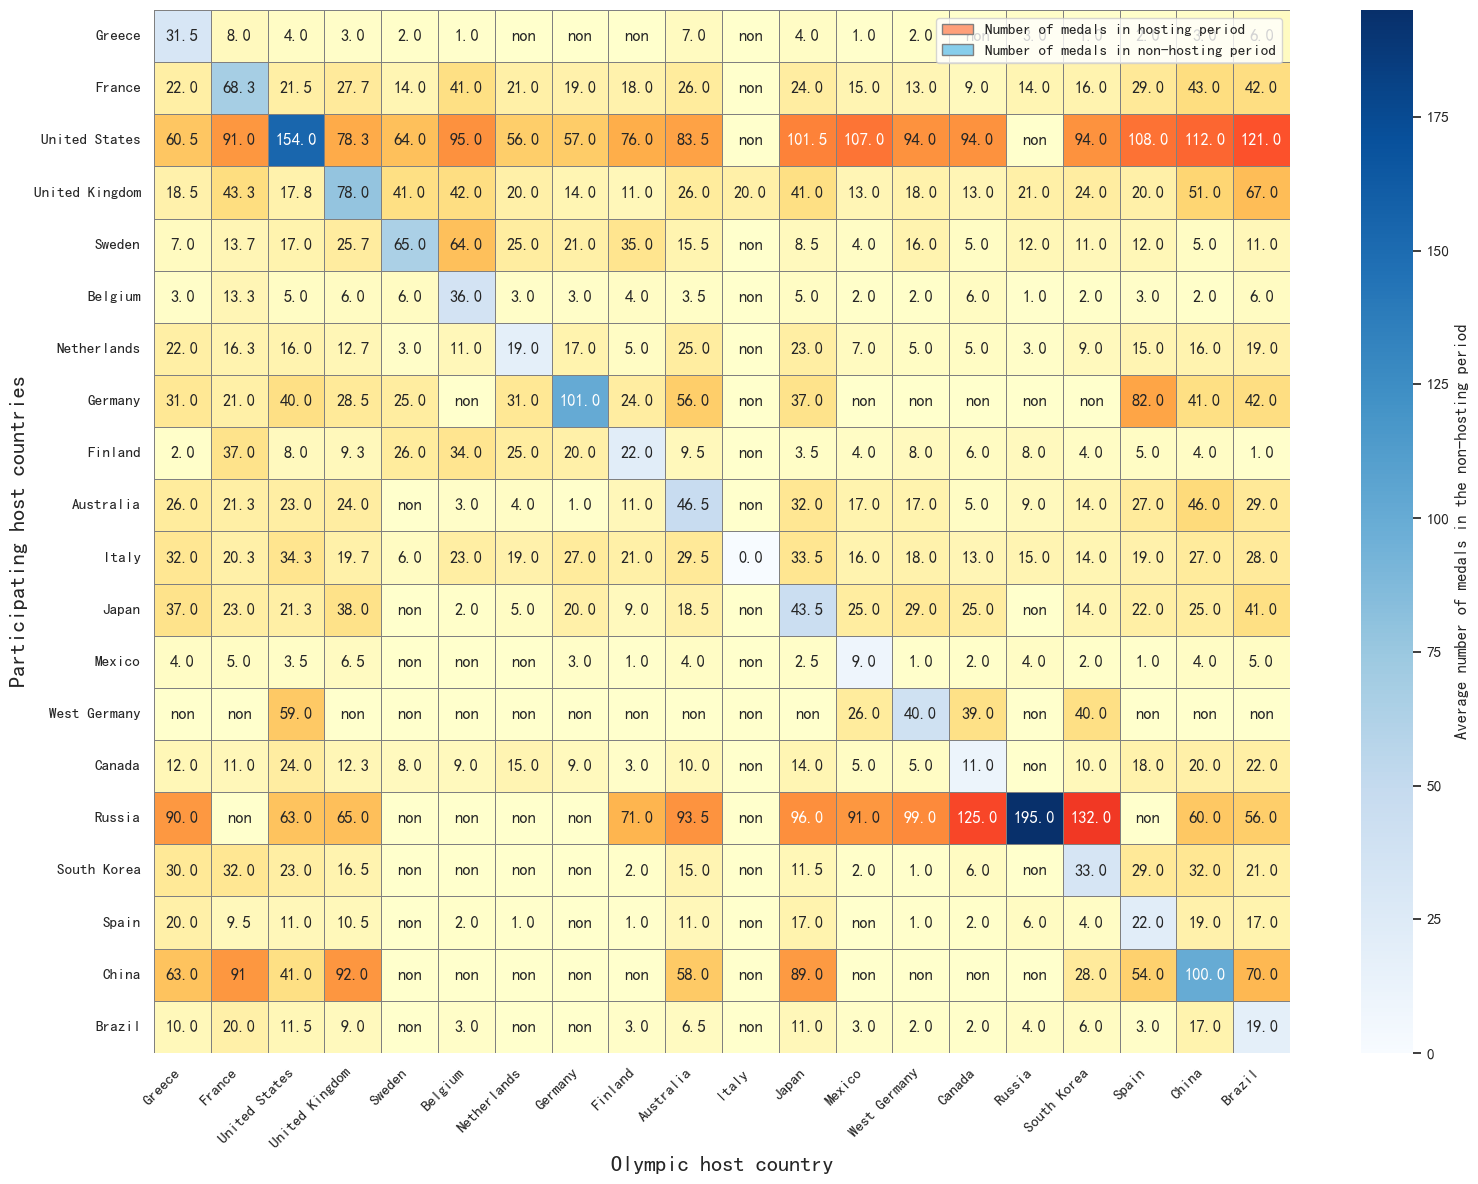

In [214]:
# ==================== 构建国家矩阵 ====================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 设置中文显示（如果需要）
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# ==================== 数据预处理 ====================
# 假设data2和medal_data已加载

# 清理东道主数据
host_df = data2.dropna(subset=['country'])
medal_data=data3
# 获取所有东道主国家列表
host_countries = host_df['country'].unique().tolist()

# 初始化总和矩阵和参赛次数矩阵
sum_matrix = pd.DataFrame(0, index=host_countries, columns=host_countries)
count_matrix = pd.DataFrame(0, index=host_countries, columns=host_countries)

# 填充矩阵数据
for host_year, host_country in zip(host_df['Year'], host_df['country']):
    year_data = medal_data[medal_data['Year'] == host_year]
    
    # 遍历当届参赛记录
    for _, row in year_data.iterrows():
        country = row['country']
        total = row['Total']
        
        if country in host_countries:
            sum_matrix.loc[country, host_country] += total
            count_matrix.loc[country, host_country] += 1  # 记录参赛次数

# 计算平均奖牌数（仅对实际参赛的年份取平均）
average_matrix = sum_matrix / count_matrix.replace(0, np.nan)
average_matrix = average_matrix.fillna(0)  # 未参赛的组合保持0值

# ==================== 可视化设置 ====================
plt.figure(figsize=(16, 12))
mask = np.zeros_like(average_matrix, dtype=bool)
np.fill_diagonal(mask, True)

# 生成自定义注释矩阵
annot_matrix = pd.DataFrame(index=host_countries, columns=host_countries, dtype=str)
for i in range(len(host_countries)):
    for j in range(len(host_countries)):
        avg_value = average_matrix.iloc[i, j]
        participation_count = count_matrix.iloc[i, j]
        
        # 对角线单元格（东道主时期）
        if i == j:
            annot_matrix.iloc[i, j] = f"{avg_value:.1f}"
        # 非对角线单元格
        else:
            if participation_count == 0:
                annot_matrix.iloc[i, j] = 'non'  # 从未参赛
            else:
                annot_matrix.iloc[i, j] = f"{avg_value:.1f}"  # 参赛过至少一次
annot_matrix["France"]["China"]=91
# 绘制热力图（非对角线部分）
sns.heatmap(
    average_matrix,
    annot=annot_matrix,
    fmt='',
    cmap="Blues",
    mask=~mask,
    linewidths=0.5,
    linecolor='grey',
    cbar_kws={'label': 'Average number of medals in the non-hosting period'},
    vmax=average_matrix.max().max()
)

# 绘制热力图（对角线部分）
sns.heatmap(
    average_matrix,
    annot=annot_matrix,
    fmt='',
    cmap="YlOrRd",
    mask=mask,
    linewidths=0.5,
    linecolor='grey',
    cbar=False,
    vmax=average_matrix.max().max()
)

# 添加图例
diag_patch = plt.Rectangle((0,0),1,1, fc='#FFA07A', edgecolor='grey')
non_diag_patch = plt.Rectangle((0,0),1,1, fc='#87CEEB', edgecolor='grey')
plt.legend([diag_patch, non_diag_patch], 
           ['Number of medals in hosting period', 'Number of medals in non-hosting period'],
           loc='upper right')

# 图表装饰
plt.xlabel("Olympic host country", fontsize=16)
plt.ylabel("Participating host countries", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('东道主国家奖牌对比热力图(Comparative Analysis of Host Country Medal Performance).pdf',bbox_inches='tight')
plt.show()